In [10]:
import warnings
warnings.filterwarnings('ignore')
from glob import glob 
import sys
sys.path.append('./')
from modules import dendro_misc, dendro_clusters

In [15]:
# Define names and filenames...

galaxy = 'ngc0628'
galaxy_cat = 'ngc628'
galaxy_hst = 'ngc628c'
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'

hstha_file = '%s/data_hstha/%s/hst_contsub/%s_hst_ha_sic.fits' %(root_dir, galaxy_hst, galaxy_hst)
muscat_file = '%s/data_hstha/%s/muse/%s_nebmask.fits' %(root_dir, galaxy_hst, galaxy.upper())
musha_file = '%s/data_hstha/%s/muse/%s-*_MAPS.fits' %(root_dir, galaxy_hst, galaxy.upper())
musha_file = glob(musha_file)[0] #because of resolution in name

cutout_dir = '%s/data_hstha_nebulae_catalogue/%s/cutouts' %(root_dir, galaxy_hst)
dendro_dir = '%s/data_hstha_nebulae_catalogue/%s/dendro' %(root_dir, galaxy_hst)
cutouts_hdus_dir = '%s/data_hstha_nebulae_catalogue/%s/cutouts_hdus' %(root_dir, galaxy_hst)

rerun_all = True
rerun_masking = True
rerun_getcutouts = False

regions_file = '%s/sample.reg' %cutout_dir
regions_pickel_file = '%s/sample.pickel' %cutout_dir
sample_table_file = '%s/data_misc/sample_table/phangs_sample_table_v1p6.fits' %root_dir
muscat_table_file = '%s/data_misc/nebulae_catalogue/Nebulae_catalogue_v3.fits' %root_dir

cluster_table_file = '%s/data_misc/multiscale_stellar_associations/%s/vselect/ws32pc/PHANGS_IR4_hst_wfc3_%s_v1p3_multi_assoc-vselect-ws32pc-main.fits' %(root_dir, galaxy_cat, galaxy_cat)
cluster_mask_file =  '%s/data_misc/multiscale_stellar_associations/%s/vselect/ws32pc/PHANGS_IR4_hst_wfc3_%s_v1p3_multi_assoc-vselect-ws32pc-idmask.fits' %(root_dir, galaxy_cat, galaxy_cat)

print(hstha_file)
print(muscat_file)
print(musha_file)
print(cutout_dir)
print(dendro_dir)
print(cutouts_hdus_dir)
print(regions_file)
print(regions_pickel_file)
print(sample_table_file)
print(muscat_table_file)
print(cluster_table_file)
print(cluster_mask_file)

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_hst_ha_sic.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_nebmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628-0.92asec_MAPS.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/dendro
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts_hdus
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts/sample.reg
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts/sample.pickel
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/sample_table/phangs_sample_table_v1p6.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/nebulae_catalogue/Nebu

In [16]:
# Load regions, sample table and HDUs... 

hdus_cutouts  = dendro_misc.load_pickle('%s/hdus_all.pickel' %cutout_dir)
regions       = dendro_misc.load_pickle(regions_pickel_file)
sample_table  = dendro_misc.get_galaxyprops(galaxy, sample_table_file)
muscat_table  = dendro_misc.get_museprops(galaxy, muscat_table_file)
hdus          = dendro_misc.load_pickle('%s/hdus_all_withmasked_withdendro.pickel' %dendro_dir)
props_all     = dendro_misc.load_pickle('%s/props_all.pickel' %dendro_dir)

[INFO] [load_pickle] Load /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts/hdus_all.pickel
[INFO] [load_pickle] Load /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/cutouts/sample.pickel
[INFO] [get_galaxyprops] Getting sample table properties for ngc0628...
[INFO] [get_MuseProps] Getting MUSE catalouge properties for ngc0628...
[INFO] [load_pickle] Load /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/dendro/hdus_all_withmasked_withdendro.pickel
[INFO] [load_pickle] Load /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/dendro/props_all.pickel


In [18]:
cluster_table, cluster_mask = dendro_clusters.load_clusters(cluster_table_file, cluster_mask_file)

[INFO] Loading /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/multiscale_stellar_associations/ngc628/vselect/ws32pc/PHANGS_IR4_hst_wfc3_ngc628_v1p3_multi_assoc-vselect-ws32pc-main.fits
[INFO] Loading /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/multiscale_stellar_associations/ngc628/vselect/ws32pc/PHANGS_IR4_hst_wfc3_ngc628_v1p3_multi_assoc-vselect-ws32pc-idmask.fits


In [5]:
if rerun_getcutouts:
    hdus = dendro_clusters.get_clusters_cutouts(cluster_mask, hdus, props_all)
    dendro_misc.save_pickle(hdus, '%s/hdus_all_withmasked_withdendro_withclusters.pickel' %dendro_dir)
else:
    hdus = dendro_misc.load_pickle('%s/hdus_all_withmasked_withdendro_withclusters.pickel' %dendro_dir)

[INFO] [load_pickle] Load /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/dendro/hdus_all_withmasked_withdendro_withclusters.pickel


In [6]:
# Get clusters withing the Dendro leaves, and export region file of these clusters

props_all_cluster = dendro_clusters.get_clusters_all(cluster_table, hdus, props_all)

  0%|          | 0/2869 [00:00<?, ?it/s]

In [7]:
props_all_cluster

region_ID,hstcat_region_ID,_idx,area_ellipse,area_exact,HA6562_FLUX_HST,major_sigma,minor_sigma,position_angle,mean_sigma,x_cen,y_cen,radius_trunk,radius_trunkclose,major_fwtm,minor_fwtm,mean_fwtm,mean_hwtm,major_fwhm,minor_fwhm,mean_fwhm,mean_hwhm,min_npix,min_value_sig,min_delta_sig,radius_trunk_pc,radius_trunkclose_pc,major_fwtm_pc,minor_fwtm_pc,mean_fwtm_pc,mean_hwtm_pc,major_fwhm_pc,minor_fwhm_pc,mean_fwhm_pc,mean_hwhm_pc,ra_cen,dec_cen,mean_sigma_pc,x_max,y_max,ra_max,dec_max,flag_edge_hst,gal_name,cen_x,cen_y,cen_ra,cen_dec,cen_x_geo,cen_y_geo,flag_edge,flag_nearby,flag_star,deproj_dist,deproj_phi,region_area,region_circ_rad,HB4861_FLUX,OIII5006_FLUX,HA6562_FLUX,NII6583_FLUX,SII6716_FLUX,SII6730_FLUX,SIII9068_FLUX,OI6300_FLUX,NII5754_FLUX,HEI5875_FLUX,SIII6312_FLUX,OI6363_FLUX,OII7319_FLUX,OII7330_FLUX,HB4861_FLUX_ERR,OIII5006_FLUX_ERR,HA6562_FLUX_ERR,NII6583_FLUX_ERR,SII6716_FLUX_ERR,SII6730_FLUX_ERR,SIII9068_FLUX_ERR,OI6300_FLUX_ERR,NII5754_FLUX_ERR,HEI5875_FLUX_ERR,SIII6312_FLUX_ERR,OI6363_FLUX_ERR,OII7319_FLUX_ERR,OII7330_FLUX_ERR,HA6562_SIGMA,NII6583_SIGMA,OIII5006_SIGMA,HA6562_VEL,NII6583_VEL,OIII5006_VEL,HA6562_SIGMA_ERR,NII6583_SIGMA_ERR,OIII5006_SIGMA_ERR,HA6562_VEL_ERR,NII6583_VEL_ERR,OIII5006_VEL_ERR,HB4861_FLUX_CORR,OIII5006_FLUX_CORR,HA6562_FLUX_CORR,NII6583_FLUX_CORR,SII6716_FLUX_CORR,SII6730_FLUX_CORR,SIII9068_FLUX_CORR,OI6300_FLUX_CORR,NII5754_FLUX_CORR,HEI5875_FLUX_CORR,SIII6312_FLUX_CORR,OI6363_FLUX_CORR,OII7319_FLUX_CORR,OII7330_FLUX_CORR,HB4861_FLUX_CORR_ERR,OIII5006_FLUX_CORR_ERR,HA6562_FLUX_CORR_ERR,NII6583_FLUX_CORR_ERR,SII6716_FLUX_CORR_ERR,SII6730_FLUX_CORR_ERR,SIII9068_FLUX_CORR_ERR,OI6300_FLUX_CORR_ERR,NII5754_FLUX_CORR_ERR,HEI5875_FLUX_CORR_ERR,SIII6312_FLUX_CORR_ERR,OI6363_FLUX_CORR_ERR,OII7319_FLUX_CORR_ERR,OII7330_FLUX_CORR_ERR,EBV,EBV_ERR,met_scal,met_scal_err,logq_D91,logq_D91_err,t_N2,t_S3,t_N2_err,t_S3_err,BPT_NII,BPT_SII,BPT_OI,LOG_SIGMA_SFR_CHAB,LOG_SIGMA_STMASS_CHAB,5thNN_dist,NN_number,Environment,r_R25,r_reff,Lum_HA6562_CORR,Delta_met_scal,pc_per_pixel,EW_HA6562_raw,EW_HA6562_raw_ERR,EW_HB4861_raw,EW_HB4861_raw_ERR,EW_HA6562_fit,EW_HA6562_fit_ERR,EW_HB4861_fit,EW_HB4861_fit_ERR,EW_HA6562_bgcorr,EW_HA6562_bgcorr_ERR,EW_HB4861_bgcorr,EW_HB4861_bgcorr_ERR,HII_class_v2,HII_class_v3,HA6562_FLUX_HST_CORR,HA6562_LUMINOSITY_HST,reg_id,reg_x,reg_y,reg_ra,reg_dec,reg_area,reg_rad,NUV_dolflux_mjy,NUV_dolflux_mjy_err,U_dolflux_mjy,U_dolflux_mjy_err,B_dolflux_mjy,B_dolflux_mjy_err,V_dolflux_mjy,V_dolflux_mjy_err,I_dolflux_mjy,I_dolflux_mjy_err,NUV_dolmag_vega,NUV_dolmag_vega_err,U_dolmag_vega,U_dolmag_vega_err,B_dolmag_vega,B_dolmag_vega_err,V_dolmag_vega,V_dolmag_vega_err,I_dolmag_vega,I_dolmag_vega_err,reg_dolflux_Age_MinChiSq,reg_dolflux_Age_MinChiSq_err,reg_dolflux_Mass_MinChiSq,reg_dolflux_Mass_MinChiSq_err,reg_dolflux_Ebv_MinChiSq,reg_dolflux_Ebv_MinChiSq_err,reg_dolflux_ChiSq_Reduced,cluster_ID
,,,arcsec2,arcsec2,erg / (s cm2),arcsec,arcsec,deg,arcsec,pix,pix,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,,,,pc,pc,pc,pc,pc,pc,pc,pc,pc,pc,deg,deg,pc,pix,pix,deg,deg,,,pix,pix,deg,deg,pix,pix,,,,arcsec,rad,pix2,arcsec,1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm

In [8]:
# Save table with appended cluster information

# Only take non-masked values in table
props_all_cluster_masked = props_all_cluster[~props_all_cluster.mask['reg_dolflux_Ebv_MinChiSq']]

dendro_misc.save_pickle(props_all_cluster_masked, '%s/props_all_cluster.pickel' %dendro_dir)        
props_all_cluster_masked.write('%s/props_all_cluster.fits' %dendro_dir, overwrite=True)

[INFO] [save_pickle] Saved to /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha_nebulae_catalogue/ngc628c/dendro/props_all_cluster.pickel


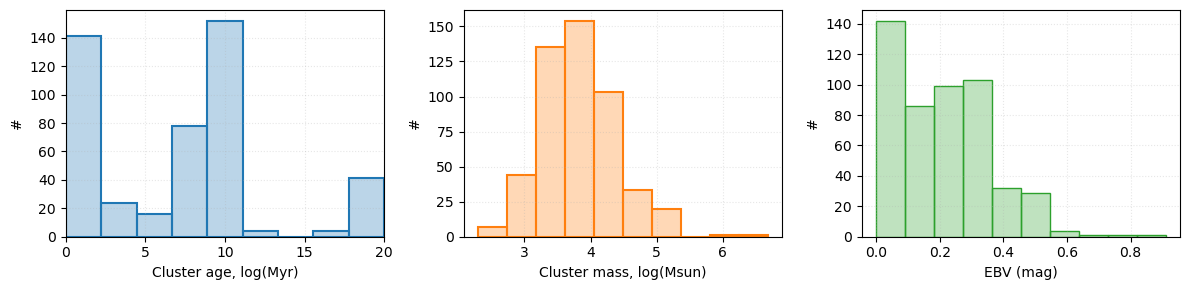

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.hist(props_all_cluster_masked['reg_dolflux_Age_MinChiSq'], alpha=0.3, fc='C0', bins=np.linspace(0,20,10))
ax1.hist(props_all_cluster_masked['reg_dolflux_Age_MinChiSq'], fc='none', ec='C0', lw=1.5, bins=np.linspace(0,20,10))
ax1.set_ylabel('#')
ax1.set_xlabel('Cluster age, log(Myr)')
ax1.grid(alpha=0.3, linestyle=':')
ax1.set_xlim(0,20)

ax2.hist(np.log10(props_all_cluster_masked['reg_dolflux_Mass_MinChiSq']), alpha=0.3, fc='C1')
ax2.hist(np.log10(props_all_cluster_masked['reg_dolflux_Mass_MinChiSq']), fc='none', ec='C1', lw=1.5)
ax2.set_ylabel('#')
ax2.set_xlabel('Cluster mass, log(Msun)')
ax2.grid(alpha=0.3, linestyle=':')

ax3.hist(props_all_cluster_masked['reg_dolflux_Ebv_MinChiSq'], alpha=0.3, fc='C2')
ax3.hist(props_all_cluster_masked['reg_dolflux_Ebv_MinChiSq'], fc='none', ec='C2')
ax3.set_ylabel('#')
ax3.set_xlabel('EBV (mag)')
ax3.grid(alpha=0.3, linestyle=':')

fig.tight_layout()